In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('../Matrix-Chain-4/logs/event_log-1.csv')

In [39]:
df.head()

,case:concept:name,concept:name,time:start,time:end,case:dims,case:threads
0,V1R19,"matmul(A,B)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4
1,V1R19,"matmul(T_AB,C)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4
2,V1R19,"matmul(T_ABC,D)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4
3,V2R33,"matmul(B,C)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4
4,V2R33,"matmul(A,T_BC)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4


In [9]:
 dfs= df.drop_duplicates('case:concept:name', keep='first')[['case:concept:name','time:start']]
dfs

,case:concept:name,time:start
0,V1R19,1.652347e+09
3,V2R33,1.652347e+09
6,V5R14,1.652347e+09
9,V1R24,1.652347e+09
12,V3R23,1.652347e+09
...,...,...
1035,V5R44,1.652347e+09
1038,V3R26,1.652347e+09
1041,V2R48,1.652347e+09
1044,V4R63,1.652347e+09


In [11]:
 dfe = df.drop_duplicates('case:concept:name', keep='last')[['case:concept:name','time:end']]
dfe

,case:concept:name,time:end
2,V1R19,1.652347e+09
5,V2R33,1.652347e+09
8,V5R14,1.652347e+09
11,V1R24,1.652347e+09
14,V3R23,1.652347e+09
...,...,...
1037,V5R44,1.652347e+09
1040,V3R26,1.652347e+09
1043,V2R48,1.652347e+09
1046,V4R63,1.652347e+09


In [67]:
dfm = dfs.merge(dfe, on='case:concept:name')
dfm

,case:concept:name,time:start,time:end
0,V1R19,1.652347e+09,1.652347e+09
1,V2R33,1.652347e+09,1.652347e+09
2,V5R14,1.652347e+09,1.652347e+09
3,V1R24,1.652347e+09,1.652347e+09
4,V3R23,1.652347e+09,1.652347e+09
...,...,...,...
345,V5R44,1.652347e+09,1.652347e+09
346,V3R26,1.652347e+09,1.652347e+09
347,V2R48,1.652347e+09,1.652347e+09
348,V4R63,1.652347e+09,1.652347e+09


In [89]:
 dfm['durtion'] = dfm.apply(lambda row: row['time:end']-row['time:start'], axis=1)
dfm

,case:concept:name,time:start,time:end,durtion
0,V1R19,1.652347e+09,1.652347e+09,0.022103
1,V2R33,1.652347e+09,1.652347e+09,0.008886
2,V5R14,1.652347e+09,1.652347e+09,0.001435
3,V1R24,1.652347e+09,1.652347e+09,0.003542
4,V3R23,1.652347e+09,1.652347e+09,0.080922
...,...,...,...,...
345,V5R44,1.652347e+09,1.652347e+09,0.001096
346,V3R26,1.652347e+09,1.652347e+09,0.057240
347,V2R48,1.652347e+09,1.652347e+09,0.006200
348,V4R63,1.652347e+09,1.652347e+09,0.032949


In [70]:
dfm.loc[dfm['case:concept:name'] == "V1R1"]

,case:concept:name,time:start,time:end,durtion
161,V1R1,1.652347e+09,1.652347e+09,0.005931


In [40]:
 df['duration'] = df.apply(lambda row: row['time:end']-row['time:start'], axis=1)

In [41]:
df

,case:concept:name,concept:name,time:start,time:end,case:dims,case:threads,duration
0,V1R19,"matmul(A,B)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4,0.017863
1,V1R19,"matmul(T_AB,C)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4,0.000226
2,V1R19,"matmul(T_ABC,D)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4,0.004014
3,V2R33,"matmul(B,C)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4,0.002100
4,V2R33,"matmul(A,T_BC)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4,0.004068
...,...,...,...,...,...,...,...
1045,V4R63,"matmul(B,T_CD)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4,0.003662
1046,V4R63,"matmul(A,T_BCD)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4,0.028863
1047,V5R0,"matmul(A,B)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4,0.000741
1048,V5R0,"matmul(C,D)",1.652347e+09,1.652347e+09,"[300, 4000, 30, 320, 3000]",4,0.000002


In [73]:
df2 = df.groupby(['case:concept:name'],sort=False, as_index=False).agg({'duration': ['sum']})

In [74]:
df2

,case:concept:name,duration
,,sum
0,V1R19,0.022103
1,V2R33,0.008886
2,V5R14,0.001435
3,V1R24,0.003542
4,V3R23,0.080922
...,...,...
345,V5R44,0.001096
346,V3R26,0.057240
347,V2R48,0.006200


In [77]:
df2[df2['case:concept:name'].str.contains("V1")]

,case:concept:name,duration
,,sum
0,V1R19,0.022103
3,V1R24,0.003542
5,V1R55,0.003301
11,V1R15,0.003865
12,V1R26,0.003866
...,...,...
317,V1R18,0.003404
329,V1R23,0.003118
337,V1R21,0.003244


In [85]:
df2[df2['case:concept:name'].str.contains("V1")].iloc[[0]]['duration']['sum']

0    0.022103
Name: sum, dtype: float64

In [91]:
dfm[dfm['case:concept:name'].str.contains("V1")]

,case:concept:name,time:start,time:end,durtion
0,V1R19,1.652347e+09,1.652347e+09,0.022103
3,V1R24,1.652347e+09,1.652347e+09,0.003542
5,V1R55,1.652347e+09,1.652347e+09,0.003301
11,V1R15,1.652347e+09,1.652347e+09,0.003865
12,V1R26,1.652347e+09,1.652347e+09,0.003866
...,...,...,...,...
317,V1R18,1.652347e+09,1.652347e+09,0.003404
329,V1R23,1.652347e+09,1.652347e+09,0.003118
337,V1R21,1.652347e+09,1.652347e+09,0.003244
338,V1R4,1.652347e+09,1.652347e+09,0.002833


In [102]:
dfm[dfm['case:concept:name'].str.contains("V1")].iloc[[0]]['durtion'].values[0]

0.022102832794189453

In [ ]:
## NEW

In [145]:
df = pd.read_csv('../Matrix-Chain-4/logs/event_log-1.csv')

In [146]:
def calculate_durations(df):
    dfs= df.drop_duplicates('case:concept:name', keep='first')[['case:concept:name','time:start']]
    dfe = df.drop_duplicates('case:concept:name', keep='last')[['case:concept:name','time:end']]
    dfm = dfs.merge(dfe, on='case:concept:name')
    dfm['duration'] = dfm.apply(lambda row: row['time:end']-row['time:start'], axis=1)
    return dfm
    

In [147]:
dfm = calculate_durations(df)

In [148]:
variants = ['V1', 'V2', 'V3', 'V4', 'V5']

In [149]:
def get_reference_time(variants,df):
    ref = {}
    for variant in variants:
        #ref[variant] = df[df['case:concept:name'].str.contains(variant)].iloc[[0]]['duration'].values[0]
        ref[variant] = df[df['case:concept:name'].str.contains(variant)]['duration'].min()
        
    return ref
        
    

In [150]:
ref = get_reference_time(variants,dfm)
ref

{'V1': 0.0028328895568847656,
 'V2': 0.006199836730957031,
 'V3': 0.057145118713378906,
 'V4': 0.032948970794677734,
 'V5': 0.0010309219360351562}

In [151]:
def add_deviation(row,refs):
    name = row['case:concept:name'].split('R')[0]
    return (row['duration'] - refs[name])/float(refs[name])

def add_deviations_to_df(df,refs):
    df['deviation'] = df.apply(lambda row: add_deviation(row,refs), axis=1)
    

In [152]:
add_deviations_to_df(dfm,ref)

In [154]:
dfm[dfm['case:concept:name'].str.contains("V3")]

,case:concept:name,time:start,time:end,duration,deviation
4,V3R23,1.652347e+09,1.652347e+09,0.080922,0.416081
6,V3R45,1.652347e+09,1.652347e+09,0.073955,0.294162
10,V3R24,1.652347e+09,1.652347e+09,0.072134,0.262295
13,V3R50,1.652347e+09,1.652347e+09,0.067925,0.188640
24,V3R57,1.652347e+09,1.652347e+09,0.060296,0.055139
...,...,...,...,...,...
330,V3R17,1.652347e+09,1.652347e+09,0.068590,0.200276
335,V3R56,1.652347e+09,1.652347e+09,0.065468,0.145646
342,V3R27,1.652347e+09,1.652347e+09,0.059107,0.034333
343,V3R14,1.652347e+09,1.652347e+09,0.057145,0.000000


In [155]:
dfm['deviation'].where(dfm['deviation'] < 0.2, 1, inplace=True)
#dfm['deviation'].where(dfm['deviation'] < 0.2, 1, inplace=True)
#dfm[dfm['deviation'] <= 0.2] = 0

In [157]:
dfm[dfm['case:concept:name'].str.contains("V3")]

,case:concept:name,time:start,time:end,duration,deviation
4,V3R23,1.652347e+09,1.652347e+09,0.080922,1.000000
6,V3R45,1.652347e+09,1.652347e+09,0.073955,1.000000
10,V3R24,1.652347e+09,1.652347e+09,0.072134,1.000000
13,V3R50,1.652347e+09,1.652347e+09,0.067925,0.188640
24,V3R57,1.652347e+09,1.652347e+09,0.060296,0.055139
...,...,...,...,...,...
330,V3R17,1.652347e+09,1.652347e+09,0.068590,1.000000
335,V3R56,1.652347e+09,1.652347e+09,0.065468,0.145646
342,V3R27,1.652347e+09,1.652347e+09,0.059107,0.034333
343,V3R14,1.652347e+09,1.652347e+09,0.057145,0.000000


In [158]:
dfm['deviation'].where(dfm['deviation'] >= 0.2, 0, inplace=True)

In [159]:
dfm[dfm['case:concept:name'].str.contains("V3")]

,case:concept:name,time:start,time:end,duration,deviation
4,V3R23,1.652347e+09,1.652347e+09,0.080922,1.0
6,V3R45,1.652347e+09,1.652347e+09,0.073955,1.0
10,V3R24,1.652347e+09,1.652347e+09,0.072134,1.0
13,V3R50,1.652347e+09,1.652347e+09,0.067925,0.0
24,V3R57,1.652347e+09,1.652347e+09,0.060296,0.0
...,...,...,...,...,...
330,V3R17,1.652347e+09,1.652347e+09,0.068590,1.0
335,V3R56,1.652347e+09,1.652347e+09,0.065468,0.0
342,V3R27,1.652347e+09,1.652347e+09,0.059107,0.0
343,V3R14,1.652347e+09,1.652347e+09,0.057145,0.0


In [160]:
def mask_deviations(df, c):
    df['deviation'].where(df['deviation'] < c, 1, inplace=True)
    df['deviation'].where(df['deviation'] >= c, 0, inplace=True)
    

In [173]:
## NEW 2

In [205]:
df = pd.read_csv('../Matrix-Chain-4/logs/event_log-1.csv')

In [206]:
dfm = calculate_durations(df)

In [207]:
variants = ['V1', 'V2', 'V3', 'V4', 'V5']

In [208]:
ref = get_reference_time(variants,dfm)

In [209]:
add_deviations_to_df(dfm,ref)

In [210]:
mask_deviations(dfm,0.5)

In [211]:
dfm

,case:concept:name,time:start,time:end,duration,deviation
0,V1R19,1.652347e+09,1.652347e+09,0.022103,1.0
1,V2R33,1.652347e+09,1.652347e+09,0.008886,0.0
2,V5R14,1.652347e+09,1.652347e+09,0.001435,0.0
3,V1R24,1.652347e+09,1.652347e+09,0.003542,0.0
4,V3R23,1.652347e+09,1.652347e+09,0.080922,0.0
...,...,...,...,...,...
345,V5R44,1.652347e+09,1.652347e+09,0.001096,0.0
346,V3R26,1.652347e+09,1.652347e+09,0.057240,0.0
347,V2R48,1.652347e+09,1.652347e+09,0.006200,0.0
348,V4R63,1.652347e+09,1.652347e+09,0.032949,0.0


In [212]:
plt.rcParams['figure.figsize'] = [14, 8]

<module 'matplotlib.pyplot' from '/Users/aravind/exercise/PyCharmProjects/performance-analyzer/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

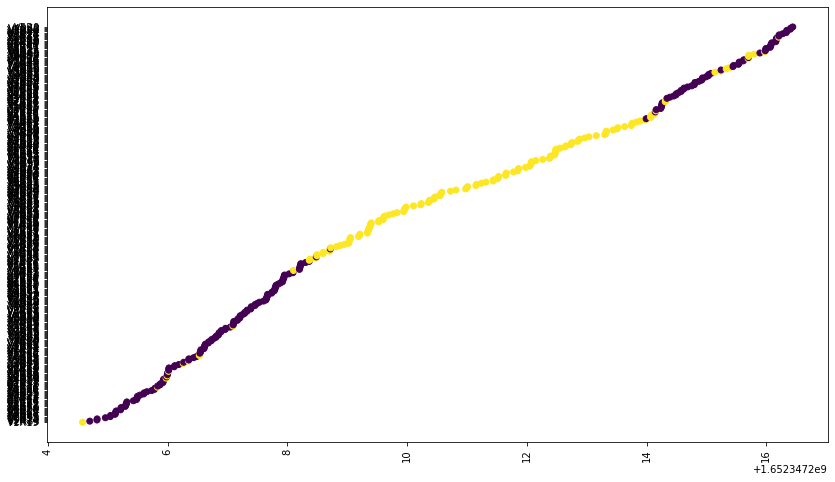

In [213]:
plt.scatter(dfm['time:start'], dfm['case:concept:name'], c=dfm['deviation'])
plt.xticks(rotation=90)
plt

In [214]:
## NEW 3

In [215]:
df3 = pd.read_csv('../Matrix-Chain-4/logs/deviations-3.csv')

<module 'matplotlib.pyplot' from '/Users/aravind/exercise/PyCharmProjects/performance-analyzer/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

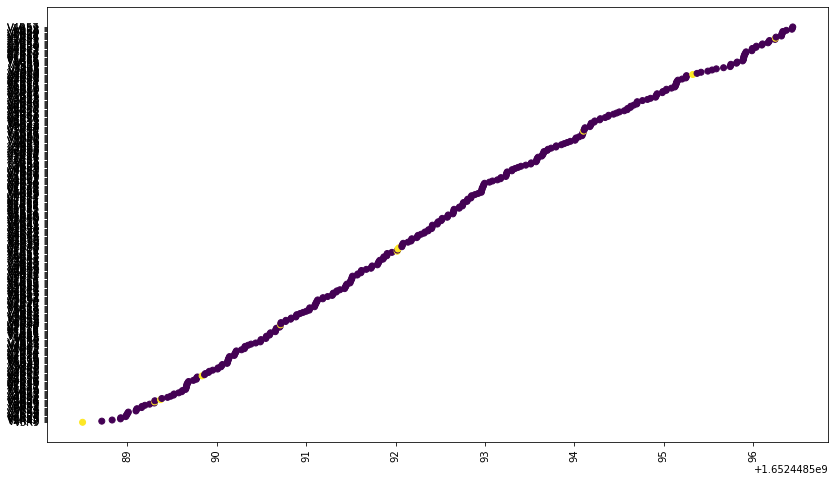

In [216]:
plt.scatter(df3['time:start'], df3['case:concept:name'], c=df3['deviation'])
plt.xticks(rotation=90)
plt